In [1]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('D:/MSC/INTERSHIP/DSDA/spotify-2023.csv',encoding = 'latin-1')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Data Preprocessing

In [4]:
# Define utility functions
def categorical_to_numeric(df):
    # Converting categorical values in data set to numeric attributes
    # Mapping of musical keys to frequencies (in Hz)
    key_to_frequency = {
        'A': 440,
        'A#': 466,
        'B': 494,
        'C': 523,
        'C#': 554,
        'D': 587,
        'D#': 622,
        'E': 659,
        'F': 699,
        'F#': 740,
        'G': 784,
        'G#': 831
    }

    # Replace the kyes of the track in the 'key' column with their frequencies
    df['key'] = df['key'].map(key_to_frequency)

    # Replace Major with 1 and minor with 0 in the mode column
    df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})
    return df

In [5]:
def impute_missing_values(df):
    # Iterate through numeric columns
    for column in df.columns[2:]:
        # Convert non-numeric values to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
        # Fill missing values with median
        median = round(data[column].median(),2)
        df.fillna({column: median}, inplace=True)
    return df



In [6]:
def to_int(df):
    # Iterate through columns starting from the third column
    for column in df.columns[2:]:
        # Convert the data type of each column to integer
        df[column] = df[column].astype(int)
    return df

In [7]:
# Preprocess data
def data_preprocessing(df):
    
    # Convert Categorical to Numeric
    df = categorical_to_numeric(df)
    
    # Handle missing values by filling with median of the column
    df = impute_missing_values(df)

    # Convert all columns to int
    df = to_int(df)
    
    # Normalize data
    #data = normalize_variables(data)

    return df

data= data_preprocessing(df)

# Correlating Attributes

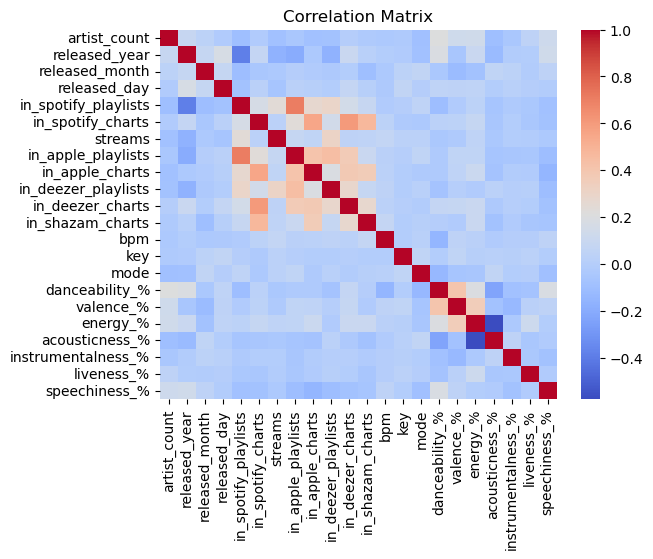

In [8]:
# Display correlations between features and target

numeric_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 
                  'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 
                  'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 
                  'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 
                  'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
                  'liveness_%', 'speechiness_%']

# Correlation matrix to understand relationships between features
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Dropping columns

In [9]:
# Dropping columns with absolute correlation less than 0.2
dropped_columns = ['artist_count','released_month', 'released_day', 
                  'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 
                  'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
                  'liveness_%', 'speechiness_%']

data = data.drop(columns = dropped_columns)

# Displaying relationships with strong correlation

The remaining columns in the data set either have a strong positive or negative correlation with the taget variable

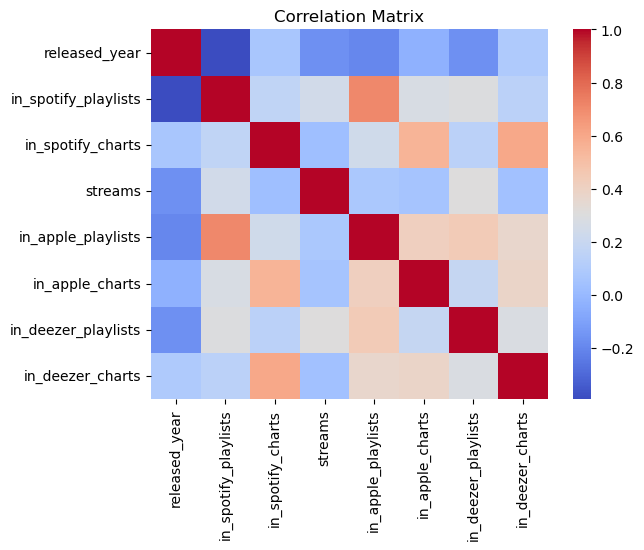

In [10]:
# Correlation matrix to understand relationships between features

numeric_columns = ['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 
                   'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Normalizing

In [11]:
# Normalize the data
data_desc = data.describe()
data_desc = data_desc.drop(['count','std','25%','50%','75%'])
print('Before Scalling:\n',data.describe())

# Function to normalize numerical variables
for column in data.columns[2:]:
    # Normalize numerical variables using min-max scaling
    data[column] = (data[column] - data_desc[column]['min']) / (data_desc[column]['max']- data_desc[column]['min'])
print('After Scalling:\n',data.describe())

Before Scalling:
        released_year  in_spotify_playlists  in_spotify_charts       streams  \
count     953.000000            953.000000         953.000000  9.530000e+02   
mean     2018.238195           5200.124869          12.009444  3.902825e+08   
std        11.116218           7897.608990          19.575992  6.144448e+08   
min      1930.000000             31.000000           0.000000 -2.147484e+09   
25%      2020.000000            875.000000           0.000000  1.317462e+08   
50%      2022.000000           2224.000000           3.000000  2.677896e+08   
75%      2022.000000           5542.000000          16.000000  6.071238e+08   
max      2023.000000          52898.000000         147.000000  2.135158e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          953.000000       953.000000           953.000000   
mean            67.812172        51.908709           103.627492   
std             86.441493        50.630241           172.435729   
mi

# Spliting the data

In [12]:
def split_data(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # Calculate the number of samples in the test set
    test_samples = int(X.shape[0] * test_size)
    
    # Split the data
    X_train = X_shuffled[:-test_samples]
    X_test = X_shuffled[-test_samples:]
    y_train = y_shuffled[:-test_samples]
    y_test = y_shuffled[-test_samples:]
    
    return X_train, y_train, X_test, y_test

# Defining LinearRegression Class

In [20]:
import numpy as np
from numpy.linalg import norm

# Example initialization
theta = np.random.randn(3)  # Replace 3 with the appropriate size for theta
theta0 = np.random.randn()  # Initialize theta0 as a single random value
theta_prev = np.zeros_like(theta)  # Initialize theta_prev for comparison

conv_threshold = 0.01  # Example convergence threshold
step_size = 0.01  # Example step size
X = np.random.randn(100, 3)  # Example feature matrix
y = np.random.randn(100)  # Example target values

while abs(norm(theta - theta_prev)) > conv_threshold:
    theta_prev = theta
    # Reshape to make broadcasting possible
    gradient = np.mean((X @ theta + theta0 - y)[:, np.newaxis] * X, axis=0)  # axis=0 to match theta's shape
    theta = theta_prev - step_size * gradient


In [21]:
def mean_squared_error(y_true, y_pred):
    return 0.5*np.mean(np.abs(y_true - y_pred))

def mean_squared_error2(theta0, theta, X, y):
        return 0.5*np.mean((y-f(theta0, theta, X))**2)

def f(theta0, theta, X):
        return np.dot(X, theta) + theta0


class LinearRegression:
    # Initializing the values for hyperparameters
    def __init__(self, step_size=0.3):
        self.step_size = step_size
        self.theta = None
        self.theta0 = None

    # The actual training function
    def fit(self, X, y, threshold=1e-5):
        # Extracting dimensions of feature set
        n_samples, n_features = X.shape
        
        # Random initialization of Theta using numpy.random
        self.theta = np.random.random(size=n_features)
        self.theta0 = np.random.random()
        
        # Gradient descent optimization
        theta_prev = np.ones(n_features)
        theta0_prev = 1
        iter = 0
        opt_pts = [self.theta]
        opt_grads = []
        
        while (np.linalg.norm(self.theta - theta_prev)) > threshold:
            theta_prev = self.theta
            gradient = self.mse_gradient(self.theta0, self.theta, X_train, y_train)
            self.theta = theta_prev - self.step_size * gradient
            opt_pts += [self.theta]
            opt_grads += [gradient]

            if iter % 100 == 0:
                print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error2(self.theta0, self.theta, X_train, y_train)))
            iter += 1 
            
           
    def mse_gradient(self, theta0, theta, X, y):
        return 0.5*np.mean((f(theta0, theta, X) - y) * X.T, axis=1)

    
    def predict(self, X):
        return np.dot(X, self.theta) + self.theta0

# Splitting the data

In [22]:
X = data.drop(['track_name', 'artist(s)_name', 'streams'], axis=1)
y = data['streams']

# Split the dataset into train and test set
X_train, y_train, X_test, y_test = split_data(X.values, y.values, test_size=0.2, random_state=42)

# Training the model

In [23]:
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

Iteration 0. MSE: 0.096968
Iteration 100. MSE: 0.014155
Iteration 200. MSE: 0.011311
Iteration 300. MSE: 0.010300
Iteration 400. MSE: 0.009799
Iteration 500. MSE: 0.009494
Iteration 600. MSE: 0.009287
Iteration 700. MSE: 0.009139
Iteration 800. MSE: 0.009029
Iteration 900. MSE: 0.008945
Iteration 1000. MSE: 0.008879
Iteration 1100. MSE: 0.008828
Iteration 1200. MSE: 0.008786
Iteration 1300. MSE: 0.008753
Iteration 1400. MSE: 0.008725
Iteration 1500. MSE: 0.008702
Iteration 1600. MSE: 0.008683
Iteration 1700. MSE: 0.008667
Iteration 1800. MSE: 0.008653
Iteration 1900. MSE: 0.008641
Iteration 2000. MSE: 0.008631
Iteration 2100. MSE: 0.008622
Iteration 2200. MSE: 0.008615
Iteration 2300. MSE: 0.008608
Iteration 2400. MSE: 0.008603
Iteration 2500. MSE: 0.008598
Iteration 2600. MSE: 0.008593
Iteration 2700. MSE: 0.008589
Iteration 2800. MSE: 0.008586
Iteration 2900. MSE: 0.008583
Iteration 3000. MSE: 0.008580
Iteration 3100. MSE: 0.008578
Iteration 3200. MSE: 0.008576
Iteration 3300. MSE: 0

# Predicting the streams on test data

The Predict method outputs prediction (streams) for given test set X_test.

In [24]:
# Make predictions
y_pred = model.predict(X_test)

print('Mean Squared Error for test data:',mean_squared_error(y_test, y_pred))
min_target = data_desc['streams']['min']
max_target = data_desc['streams']['max']

# Inverse the Min-Max scaling transformation
y_test_original = y_test * (max_target - min_target) + min_target
y_pred_original = y_pred * (max_target - min_target) + min_target
y_train_originall = y_train * (max_target - min_target) + min_target
# Print first few predicted and actual values
print("Sample Output:\nPredicted (unscaled)\t\tActual (unscaled)")
for i in range(10,20):
    print('{:.2f} ({:d})\t\t{:.2f} ({:d})'.format(y_pred[i], round(y_pred_original[i]), y_test[i], round(y_test_original[i])))

Mean Squared Error for test data: 0.04189834706888863
Sample Output:
Predicted (unscaled)		Actual (unscaled)
0.54 (152286853)		0.62 (500340342)
0.58 (320583842)		0.56 (236060709)
0.57 (297143415)		0.56 (229497852)
0.57 (286522907)		0.51 (37091576)
0.57 (301828941)		0.55 (191873381)
0.54 (152673253)		0.56 (255120451)
0.58 (341835599)		0.54 (144565150)
0.57 (300863176)		0.57 (311395144)
0.60 (437894592)		0.54 (153454328)
0.55 (222118013)		0.55 (187772591)


# Viewing results

Some of the predictions along with the actual values are displayed and visualized below

[ 0.24240973  0.31658653  0.53193927 -0.06939048 -0.51547483  0.07287758
  0.340331    0.05620678]


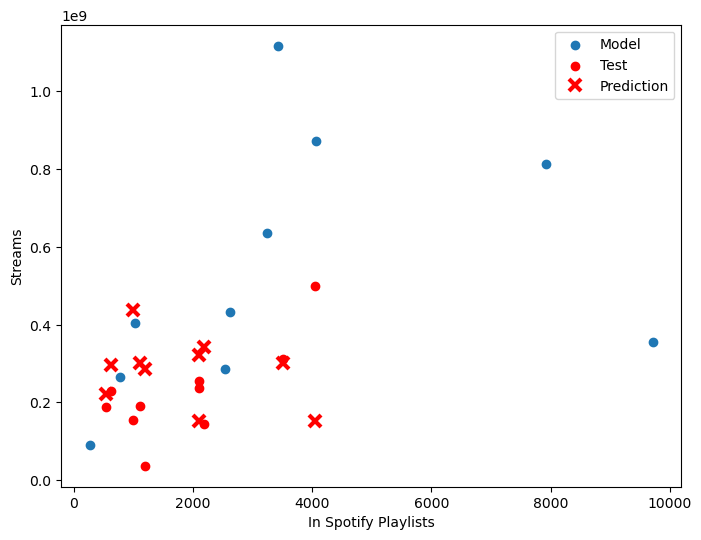

In [25]:
theta = model.theta
theta0 = model.theta0
print(np.append([theta0],theta))

min_sp = data_desc['in_spotify_playlists']['min']
max_sp = data_desc['in_spotify_playlists']['max']

X_train_Spotify = X_train[:, [1]] * (max_sp - min_sp) + min_sp
X_test_Spotify = X_test[:, [1]] * (max_sp - min_sp) + min_sp

plt.figure(figsize=(8, 6))
plt.xlabel('In Spotify Playlists')
plt.ylabel('Streams')
plt.scatter(X_train_Spotify[10:20], y_train_originall[10:20])
plt.scatter(X_test_Spotify[10:20], y_test_original[10:20], color='red', marker='o')
plt.plot(X_test_Spotify[10:20], y_pred_original[10:20], 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Test', 'Prediction'])
plt.show()

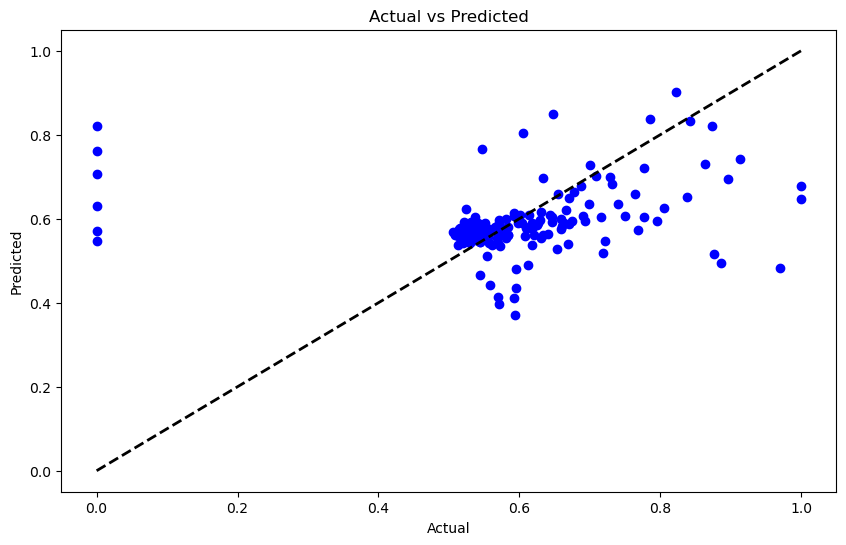

In [26]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()